In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_NN_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	4
float64		column 2	10
float64		column 3	4
float64		column 4	4
float64		column 5	8
float64		column 6	4
float64		column 7	8
float64		column 8	4
float64		column 9	2
float64		column 10	12
float64		column 11	4
float64		column 12	8


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,796.000000,790.000000,796.000000,796.000000,792.000000,796.000000,792.000000,796.000000,798.000000,788.000000,796.000000,792.000000
mean,1.496491,1.281212,1.984886,1.931581,1.997915,2.003604,1.966087,2.000102,1.997358,1.994339,1.958656,1.959335
std,2.749726,3.619197,1.146009,1.162940,1.165157,1.140222,1.162675,1.137961,1.142503,1.153532,1.181476,1.123244
min,-4.692600,-6.952900,0.020547,0.002628,0.021103,0.001674,0.005922,0.004193,0.009369,0.002484,0.002000,0.000288
25%,-0.441075,-0.712855,1.022400,0.927960,0.983605,0.988268,0.959688,0.978542,1.059775,1.037250,0.896550,0.990685
50%,0.791475,0.920730,1.975100,1.895400,2.036500,2.006650,1.974400,2.006050,1.988450,2.012150,1.940650,1.943250
75%,3.972450,4.475650,2.925475,2.929175,2.999200,3.008400,2.984625,2.934275,3.005175,2.996425,3.028400,2.866800
max,6.982200,8.018800,3.992600,3.997300,3.998500,3.997500,3.999900,3.998200,3.996200,3.998800,3.990900,3.998300


<AxesSubplot:>

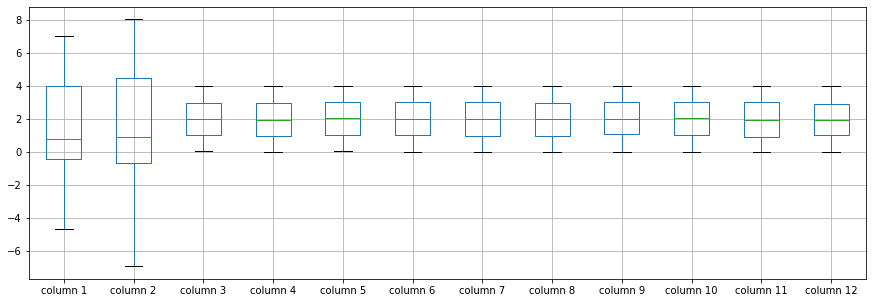

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.496491
column 2     1.281212
column 3     1.984886
column 4     1.931581
column 5     1.997915
column 6     2.003604
column 7     1.966087
column 8     2.000102
column 9     1.997358
column 10    1.994339
column 11    1.958656
column 12    1.959335
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.431628,-0.021198,0.004984,0.038573,0.044272,-0.006760,0.022585,-0.001544,0.004803,0.033518,0.017723
column 2,-0.431628,1.000000,0.004706,-0.025248,-0.032240,-0.013244,0.018610,-0.010435,0.004603,-0.045485,-0.090076,0.027179
column 3,-0.021198,0.004706,1.000000,-0.042436,0.081340,0.008482,0.019781,-0.002863,0.001827,-0.008877,-0.029390,0.015720
column 4,0.004984,-0.025248,-0.042436,1.000000,0.012851,-0.030825,0.041493,0.053630,-0.029722,0.040159,0.041909,-0.021181
column 5,0.038573,-0.032240,0.081340,0.012851,1.000000,0.052239,0.033125,0.015346,-0.005083,-0.011600,-0.000533,0.019082
column 6,0.044272,-0.013244,0.008482,-0.030825,0.052239,1.000000,-0.075217,0.039408,0.025310,0.002444,-0.031982,0.002115
column 7,-0.006760,0.018610,0.019781,0.041493,0.033125,-0.075217,1.000000,-0.034091,-0.006551,-0.035341,-0.015522,-0.012673
column 8,0.022585,-0.010435,-0.002863,0.053630,0.015346,0.039408,-0.034091,1.000000,-0.058841,-0.042620,0.001749,-0.039853
column 9,-0.001544,0.004603,0.001827,-0.029722,-0.005083,0.025310,-0.006551,-0.058841,1.000000,0.048278,-0.011309,-0.020054
column 10,0.004803,-0.045485,-0.008877,0.040159,-0.011600,0.002444,-0.035341,-0.042620,0.048278,1.000000,-0.069006,0.049709


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+9,12+9+9,12+9+9+9,12+9+9+9+9,12+9+9+9+9+9,12+9+9+9+9+9+9,12+9+9+9+9+9,12+9+9+9+9,12+9+9+9,12+9+9,12+9,12], vae_layer = False, seed = 20)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 29.378346786499023
Epoch: 1 , loss: 29.29184509277344
Epoch: 2 , loss: 29.13976119995117
Epoch: 3 , loss: 28.976568489074708
Epoch: 4 , loss: 28.500178985595703
Epoch: 5 , loss: 26.64584545135498
Epoch: 6 , loss: 24.037721862792967
Epoch: 7 , loss: 23.224787673950196
Epoch: 8 , loss: 22.823482704162597
Epoch: 9 , loss: 22.53712303161621
Epoch: 10 , loss: 22.04833854675293
Epoch: 11 , loss: 21.83517578125
Epoch: 12 , loss: 21.648209037780763
Epoch: 13 , loss: 21.518062133789062
Epoch: 14 , loss: 21.240048713684082
Epoch: 15 , loss: 21.353543968200682
Epoch: 16 , loss: 21.022367630004883
Epoch: 17 , loss: 20.877737770080568
Epoch: 18 , loss: 20.98268684387207
Epoch: 19 , loss: 20.846758003234864
Epoch: 20 , loss: 20.64266284942627
Epoch: 21 , loss: 20.449188842773438
Epoch: 22 , loss: 20.681303329467774
Epoch: 23 , loss: 20.615685997009276
Epoch: 24 , loss: 20.707958488464357
Epoch: 25 , loss: 20.4911672

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(19.566360801562706, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.07882605148397998

In [18]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [20]:
imputations[-1].to_excel("4-gauss_NN_1(imp).xlsx", index=False, header=False)